# Sentiment Scores: Letters

For system details and resources, see PhD_SystemCheck.ipynb and PhD_Modules.ipynb

In [102]:
import nltk
from nltk.corpus import PlaintextCorpusReader
from nltk.tokenize import RegexpTokenizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
from nltk import word_tokenize

import pandas as pd
import re
import numpy as np

In [11]:
tokenizer = RegexpTokenizer('\w+')
sentenceTokenizer = nltk.data.load('tokenizers/punkt/english.pickle') #Load tokenizer
sentimentAnalyzer = SentimentIntensityAnalyzer() #Initialize sentiment scorer

In [3]:
len(sentimentAnalyzer.lexicon)

7502

In [4]:
# Here I am writing the file to a csv to figure out what is missing.
#with open('20240331_PhD_VaderLexicon-mdcleaned.csv', 'w') as f:
    #[f.write('{0},{1}\n'.format(key, value)) for key, value in sentimentAnalyzer.lexicon.items()]

In [90]:
Corpus = PlaintextCorpusReader('20240604_PhD_Letters', '.*txt') #Define corpus
len(Corpus.fileids()) #How many files

676

Make a new folder called "cleaned" in the letters folder for the output.

# Building / testing the text cleaning script

In [7]:
text = open("test/42708.txt", "r")
text = text.read()
print(text)

May 19th, 1897.

      My darling Mother
      Though rather sleepy, I must get in a letter to you
some time tonight, as I hear the horses were got in purposely
for us to ride over to Pekisko tomorrow; and it seems too long
since I sent you a letter.  "Getting in the horses" means
getting
in the whole band, as they always follow each other, and you
can never get in one without all the others.  At present they
are not even behind a fence; they might range anywhere over
the whole prairie if they liked, but likely they are "located":
that is, they look on this ranch as their home, and so they
don't go more than a mile or so from the fence.  Of course there
must be always one or two horses kept in the stable or round
the corrals, so when you want fresh horses, you can take one,
ride out and get in the band.  You corral them, then catch the
ones you want, and let the rest go.  I believe I am to have
Morgan's horse to ride tomorrow.  The handsome little chestnut
I told you about, didn't I? -

I am not deleting the word that preceeds the bracket because the bracket is sometimes adding a missing word rather than correcting a misspelled one.

In [8]:
text = re.sub(r"(\n+)"," ", text) # Replace blank lines with a single space
text = re.sub(r"(\[[^?]*?\])","", text) #Remove bracketed (i.e., transcriber) notes
text = re.sub(r"(\[)","", text) #Remove opening bracket
text = re.sub(r"(\?\])","", text) #Remove question mark and closing bracket
text = re.sub(r"(—){2,}"," ", text) # Replace 2 or more dashes with space
text = re.sub(r"(-){2,}"," ", text) # Replace 2 or more hyphens with space
text = re.sub(r"(&dot)","", text) # Remove this expression (a dot)
text = re.sub(r"(_)","", text) # Remove underscore
text = re.sub(r"([Ã,Â])","", text) # Remove special characters
text = re.sub(r"(£)"," pounds ", text) # Replace pound symbol with word
text = re.sub(r"( & )"," and ", text) # Replace ampersand with word
text = re.sub(r"(\r)"," ", text) # Replace /r with blank space
text = re.sub(r"(\˙)","", text) # Remove dot
text = re.sub(r"(\#PAGE)","", text) #Remove #Page
text = re.sub(r"(\(sic\))","", text) #Remove #sic
text = re.sub(r"(\. ){2,}","", text) # Remove ellipses
text = re.sub(r"(\/)","", text) # Remove backslash
text = re.sub(r"(^\s*)","", text) # Remove blank spaces at the start of the string
text = re.sub(r"(\s){2,}"," ", text) # Replace 2 or more white spaces with just one
text = re.sub(r"$","\n", text) # Ensure that there is a newline to the end of the string
print(text)

May 19th 1897. My darling Mother Though rather sleepy I must get in a letter to you some time tonight as I hear the horses were got in purposely for us to ride over to Pekisko tomorrow; and it seems too long since I sent you a letter. "Getting in the horses" means getting in the whole band as they always follow each other and you can never get in one without all the others. At present they are not even behind a fence; they might range anywhere over the whole prairie if they liked but likely they are "located": that is they look on this ranch as their home and so they don't go more than a mile or so from the fence. Of course there must be always one or two horses kept in the stable or round the corrals so when you want fresh horses you can take one ride out and get in the band. You corral them then catch the ones you want and let the rest go. I believe I am to have Morgan's horse to ride tomorrow. The handsome little chestnut I told you about didn't I? - as I have given two other horses

# Now calculate sentiment for the whole folder and the original Vader lexicon

In [122]:
sentiment = pd.DataFrame(columns = ['text','docid', 'totalTokens', 'uniqueTokens', 'lexicalDiversity', 'scoreNeg', 'scoreNeu', 'scorePos', 'scoreCom']) # Create a new dataframe to hold sentences, letter id and compound scores
sentiment.head()

,text,docid,totalTokens,uniqueTokens,lexicalDiversity,scoreNeg,scoreNeu,scorePos,scoreCom


In [123]:
for fileid in Corpus.fileids(): # For each file in the corpus
    #Proprocess and save text
    f = open("20240604_PhD_Letters/cleaned/" + fileid, "w", encoding='utf-8')
    text = Corpus.raw(fileid) # Place the string into the object "text"
    text = re.sub(r"(\n+)"," ", text) # Replace blank lines with a single space
    text = re.sub(r"(\[[^?]*?\])","", text) #Remove bracketed (i.e., transcriber) notes
    text = re.sub(r"(\[)","", text) #Remove opening bracket
    text = re.sub(r"(\?\])","", text) #Remove question mark and closing bracket
    text = re.sub(r"(—){2,}"," ", text) # Replace 2 or more dashes with space
    text = re.sub(r"(-){2,}"," ", text) # Replace 2 or more hyphens with space
    text = re.sub(r"(&dot)","", text) # Remove this expression (a dot)
    text = re.sub(r"(_)","", text) # Remove underscore
    text = re.sub(r"([Ã,Â])","", text) # Remove special characters
    text = re.sub(r"(£)"," pounds ", text) # Replace pound symbol with word
    text = re.sub(r"( & )"," and ", text) # Replace ampersand with word
    text = re.sub(r"(\r)"," ", text) # Replace /r with blank space
    text = re.sub(r"(\˙)","", text) # Remove dot
    text = re.sub(r"(\#PAGE)","", text) #Remove #Page
    text = re.sub(r"(\(sic\))","", text) #Remove #sic
    text = re.sub(r"(\. ){2,}","", text) # Remove ellipses
    text = re.sub(r"(\/)","", text) # Remove backslash
    text = re.sub(r"(^\s*)","", text) # Remove blank spaces at the start of the string
    text = re.sub(r"(\s){2,}"," ", text) # Replace 2 or more white spaces with just one
    text = re.sub(r"$","\n", text) # Ensure that there is a newline to the end of the string
    f.write(text)
    f.close()
    # Now basic metrics
    tokens = tokenizer.tokenize(text)
    totalTokens = len(tokens)
    uniqueTokens = len(set(tokens))
    lexicalDiversity = uniqueTokens/totalTokens
    # Now score sentiment
    sentences = sentenceTokenizer.tokenize(text) # Place sentences into a list called "sentences"
    scoreNeg = 0.0
    scoreNeu = 0.0
    scorePos = 0.0
    scoreCom = 0.0
    #sequence = 0 # Create a counter to keep track of sentence order
    for sentence in sentences: # For each sentence in the letter 
        #sequence +=1 # Counter updater
        scores = sentimentAnalyzer.polarity_scores(sentence) # Calculate sentiment scores
        scoreNeg += scores["neg"]
        scoreNeu += scores["neu"]
        scorePos += scores["pos"]
        scoreCom += scores["compound"]
    scoreNeg = scoreNeg / len(sentences)
    scoreNeu = scoreNeu / len(sentences)
    scorePos = scorePos / len(sentences)
    scoreCom = scoreCom / len(sentences)
    new_row = pd.Series([text, fileid, totalTokens, uniqueTokens, lexicalDiversity, scoreNeg, scoreNeu, scorePos, scoreCom], index=['text','docid', 'totalTokens', 'uniqueTokens', 'lexicalDiversity', 'scoreNeg', 'scoreNeu', 'scorePos', 'scoreCom'])
    sentiment = pd.concat([sentiment, new_row.to_frame().T], ignore_index=True)
    print(fileid) # Show progress
print("done")

20910.txt
21062.txt
21324.txt
21334.txt
21354.txt
21470.txt
21549.txt
21561.txt
21737.txt
21759.txt
21792.txt
22032.txt
22146.txt
22179.txt
22270.txt
22368.txt
22375.txt
22668.txt
22911.txt
22996.txt
23229.txt
23395.txt
23409.txt
23458.txt
23470.txt
23529.txt
23567.txt
23590.txt
23790.txt
23846.txt
23880.txt
23918.txt
23927.txt
23971.txt
24011.txt
24209.txt
24226.txt
24366.txt
24472.txt
25585.txt
25771.txt
25794.txt
25809.txt
26062.txt
26197.txt
26219.txt
26431.txt
26439.txt
26511.txt
26678.txt
26789.txt
26906.txt
27000.txt
27097.txt
27261.txt
27435.txt
27442.txt
27573.txt
27695.txt
27779.txt
27805.txt
27815.txt
27889.txt
27978.txt
28535.txt
28772.txt
28774.txt
28960.txt
29132.txt
29364.txt
29748.txt
29751.txt
29826.txt
29827.txt
30200.txt
30559.txt
30620.txt
30623.txt
30636.txt
30808.txt
30868.txt
30931.txt
31245.txt
31349.txt
31379.txt
31412.txt
31637.txt
31942.txt
31969.txt
31983.txt
32094.txt
32097.txt
32418.txt
32432.txt
32543.txt
32751.txt
32756.txt
32815.txt
32964.txt
32980.txt


S9865-D033.txt
S9865-D034.txt
S9865-D035.txt
S9865-D036.txt
S9865-D037.txt
S9865-D038.txt
S9865-D039.txt
S9865-D040.txt
S9865-D045.txt
S9865-D046.txt
S9865-D047.txt
S9865-D054.txt
S9865-D055.txt
S9865-D056.txt
S9865-D057.txt
S9865-D058.txt
S9865-D059.txt
S9865-D060.txt
S9865-D061.txt
S9873-D013.txt
S9873-D014.txt
S9873-D015.txt
S9873-D017.txt
S9873-D018.txt
S9873-D019.txt
S9873-D020.txt
S9873-D021.txt
S9913-D003.txt
S9913-D004.txt
S9913-D006.txt
S9913-D015.txt
S9913-D016.txt
S9957-D012.txt
S9957-D013.txt
S9957-D014.txt
S9957-D015.txt
S9974-D008.txt
S9974-D010.txt
done


In [124]:
sentiment.head()

,text,docid,totalTokens,uniqueTokens,lexicalDiversity,scoreNeg,scoreNeu,scorePos,scoreCom
0,July 18 1891 Dear Sister I have waited until I...,20910.txt,182,119,0.653846,0.005667,0.83,0.164667,0.651067
1,Nov 17th My dearest Kate I got this interestin...,21062.txt,303,184,0.607261,0.033875,0.64325,0.322875,0.4828
2,May 25 1892 Dear Sister I write once to Bid yo...,21324.txt,210,139,0.661905,0.045,0.742,0.214,0.9883
3,1891 Oct. 12th Miss Weir Dear friend I now ans...,21334.txt,403,222,0.550868,0.059333,0.774889,0.165667,0.244944
4,February 1st 90 Dear Cousin It is with pleasur...,21354.txt,414,210,0.507246,0.019,0.814,0.167,0.9674


In [125]:
# What is the overall shape of the dataframe
sentiment.shape

(676, 9)

In [126]:
# What are the data types
sentiment.dtypes

text                object
docid               object
totalTokens         object
uniqueTokens        object
lexicalDiversity    object
scoreNeg            object
scoreNeu            object
scorePos            object
scoreCom            object
dtype: object

In [127]:
# Change a few to continuous date (float) 
cols = ['lexicalDiversity', 'scoreNeg', 'scoreNeu', 'scorePos', 'scoreCom']
sentiment[cols] = sentiment[cols].apply(pd.to_numeric, errors='coerce', axis=1)
sentiment.dtypes

text                 object
docid                object
totalTokens          object
uniqueTokens         object
lexicalDiversity    float64
scoreNeg            float64
scoreNeu            float64
scorePos            float64
scoreCom            float64
dtype: object

In [128]:
# Change a couple of others to discrete data (integer)
sentiment['totalTokens'] = sentiment['totalTokens'].astype(int)
sentiment['uniqueTokens'] = sentiment['uniqueTokens'].astype(int)
sentiment.dtypes

text                 object
docid                object
totalTokens           int64
uniqueTokens          int64
lexicalDiversity    float64
scoreNeg            float64
scoreNeu            float64
scorePos            float64
scoreCom            float64
dtype: object

In [129]:
sentiment['scoreCom'].describe()

count    676.000000
mean       0.301706
std        0.274342
min       -0.705100
25%        0.144125
50%        0.251820
75%        0.407617
max        0.999800
Name: scoreCom, dtype: float64

<Axes: >

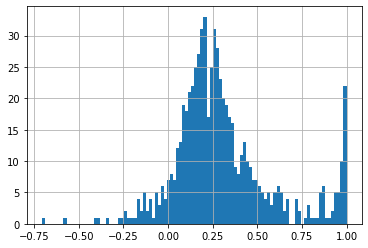

In [130]:
sentiment['scoreCom'].hist(bins=100)

Not perfectly normal but much better. Let's take a closer look at the high-scoring letters.

In [141]:
sentiment.loc[sentiment['scoreCom'] > .85]

,text,docid,totalTokens,uniqueTokens,lexicalDiversity,scoreNeg,scoreNeu,scorePos,scoreCom
2,May 25 1892 Dear Sister I write once to Bid yo...,21324.txt,210,139,0.661905,0.045000,0.742000,0.214000,0.988300
4,February 1st 90 Dear Cousin It is with pleasur...,21354.txt,414,210,0.507246,0.019000,0.814000,0.167000,0.967400
10,Octr October 29 1888 My dear Uncle George I wo...,21792.txt,1208,507,0.419702,0.054333,0.671333,0.274000,0.992400
12,New York May 3 1853 My Dear Friend In Pat Elli...,22146.txt,950,342,0.360000,0.019000,0.748500,0.232500,0.985250
21,From: 641 Folson St Street San Francisco Calif...,23395.txt,333,182,0.546547,0.065000,0.831000,0.104000,0.933900
24,August the 27 1846 Dear father and Mother Brot...,23470.txt,1052,448,0.425856,0.099000,0.784500,0.117000,0.851700
35,Feb 24th 1889 Dear Sister I have waited until ...,24209.txt,694,315,0.453890,0.085000,0.761000,0.154000,0.995400
39,July 5 1885 Dear sister it is With pleasure i ...,25585.txt,200,124,0.620000,0.043000,0.780000,0.177000,0.981200
43,February 9th 1881 Dear Cousin Mary Ann I hope ...,26062.txt,406,199,0.490148,0.005000,0.821500,0.173500,0.982500
46,April 28th 1883 Dear Daughter Eliza I once mor...,26431.txt,699,302,0.432046,0.033000,0.809000,0.158000,0.998500


In [149]:
sentiment.iloc[199,0] 

'Sept 9th 1890 Dear Sister I went to the post office this afternoon and got your letter It did me lots of good as I was suffering from one of my blue spells you may say I got a soft job when I tell you all I have to do is to go on duty at ten I have every other evening off until that time The first round I see that all the doors are locked and ring an electric clock that is on each ward to show you visited there whether you waited to do more than ring the bell or not They have temporary beds that the they use every night so we do not have to visit any patients room for the purpose of waiting on them if the they are suicidal They are muffed and belted and put in an open room The They call them pen rooms where the doors are all made of straight slats so you can see plainly through them without opening the door all the waiting I have to do on them is give them a drink once in a while I never dip my hand in water except to wash my face well you say that just suits you it does to perfection

These appear to be letters with minimal sentencing -- that is, there are few full-stops (i.e., periods). 

In [104]:
sumVal = sentiment['scoreNeg'] + sentiment['scoreNeu'] + sentiment['scorePos']
sumVal.describe()

count    676.000000
mean       0.999893
std        0.001984
min        0.963000
25%        0.999983
50%        1.000000
75%        1.000002
max        1.001000
dtype: float64

Sums of ratio type variables is adding up as it should to 1.

<Axes: >

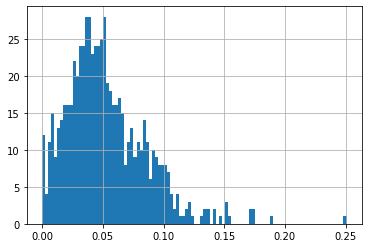

In [107]:
sentiment['scoreNeg'].hist(bins=100)

<Axes: >

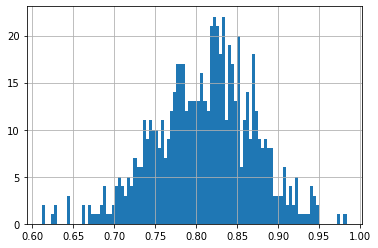

In [108]:
sentiment['scoreNeu'].hist(bins=100)

<Axes: >

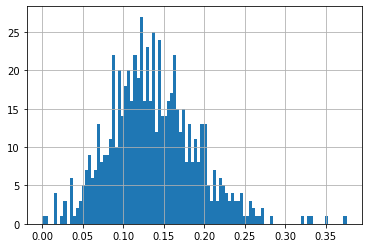

In [109]:
sentiment['scorePos'].hist(bins=100)

In [76]:
# Remove the .txt from the file name
sentiment['docid'] = sentiment['docid'].str.replace(r'.txt', '', regex=True)
sentiment

,text,docid,totalTokens,uniqueTokens,lexicalDiversity,scoreNeg,scoreNeu,scorePos,scoreCompound,scoreCom
0,July 30th 1881. My dear Mother As I learn from...,28772,401,232,0.578554,0.053684,0.822158,0.124263,NaN,0.252326
1,Feb. February 10th 1858 Dear Unkle Uncle your ...,30200,123,101,0.821138,0.070000,0.785000,0.146000,NaN,0.874100
2,Sept. 28th 1891 Dear Friend Annie I received y...,33813,533,251,0.470919,0.045750,0.763500,0.190833,NaN,0.531117
3,winock December 13th 1812 Ebenezer I have An A...,39639,476,256,0.537815,0.029333,0.876667,0.094000,NaN,0.608300
4,Dear Father and Mother Think not it is without...,40470,416,240,0.576923,0.096000,0.773500,0.130500,NaN,0.572300
5,November 11th. 1813. I thank you most sincerel...,40565,603,254,0.421227,0.035619,0.744048,0.220286,NaN,0.487524
6,Oct 29 1871 Mrs Brown Dear Sister I now sit do...,40692,1029,393,0.381924,0.104000,0.781000,0.115000,NaN,0.943600
7,April 1909 Dear Doc- By the above you see we a...,41186,643,314,0.488336,0.076840,0.840160,0.082920,NaN,-0.016608
8,May 19th 1897. My darling Mother Though rather...,42708,1345,529,0.393309,0.043500,0.818045,0.138409,NaN,0.236711
9,I wish you had seen me my beloved Margaret whe...,50132,1089,402,0.369146,0.026159,0.809913,0.163928,NaN,0.328094


In [86]:
#sentiment['text'][7]

This is the baseline distribution. Let's try the conservatively modified lexicon now. Re-start the kernal then run the cell below. Switch out the lexicons in the nltk_data folder.

# Sentiment with conservatively modified VADER lexicon (yes!)

In [1]:
import nltk
from nltk.corpus import PlaintextCorpusReader
from nltk.tokenize import RegexpTokenizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
from nltk import word_tokenize

import pandas as pd
import re
import numpy as np

tokenizer = RegexpTokenizer('\w+')
sentenceTokenizer = nltk.data.load('tokenizers/punkt/english.pickle') #Load tokenizer
sentimentAnalyzer = SentimentIntensityAnalyzer() #Initialize sentiment scorer

len(sentimentAnalyzer.lexicon)

7268

### Important for future runs of this script: The cleaning is done in block 123 above.

In [2]:
Corpus = PlaintextCorpusReader('20240604_PhD_Letters/cleaned', '.*txt') #Define corpus
len(Corpus.fileids()) #How many files

676

In [3]:
sentiment = pd.DataFrame(columns = ['text','docid', 'totalTokens', 'uniqueTokens', 'lexicalDiversity', 'scoreNeg', 'scoreNeu', 'scorePos', 'scoreCom']) # Create a new dataframe to hold sentences, letter id and compound scores
sentiment.head()

for fileid in Corpus.fileids(): # For each file in the corpus
    text = Corpus.raw(fileid) # Place the string into the object "text"
    # Now basic metrics
    tokens = tokenizer.tokenize(text)
    totalTokens = len(tokens)
    uniqueTokens = len(set(tokens))
    lexicalDiversity = uniqueTokens/totalTokens
    # Now score sentiment
    sentences = sentenceTokenizer.tokenize(text) # Place sentences into a list called "sentences"
    scoreNeg = 0.0
    scoreNeu = 0.0
    scorePos = 0.0
    scoreCom = 0.0
    #sequence = 0 # Create a counter to keep track of sentence order
    for sentence in sentences: # For each sentence in the letter 
        #sequence +=1 # Counter updater
        scores = sentimentAnalyzer.polarity_scores(sentence) # Calculate sentiment scores
        scoreNeg += scores["neg"]
        scoreNeu += scores["neu"]
        scorePos += scores["pos"]
        scoreCom += scores["compound"]
    scoreNeg = scoreNeg / len(sentences)
    scoreNeu = scoreNeu / len(sentences)
    scorePos = scorePos / len(sentences)
    scoreCom = scoreCom / len(sentences)
    new_row = pd.Series([text, fileid, totalTokens, uniqueTokens, lexicalDiversity, scoreNeg, scoreNeu, scorePos, scoreCom], index=['text','docid', 'totalTokens', 'uniqueTokens', 'lexicalDiversity', 'scoreNeg', 'scoreNeu', 'scorePos', 'scoreCom'])
    sentiment = pd.concat([sentiment, new_row.to_frame().T], ignore_index=True)
    print(fileid) # Show progress
print("done")

20910.txt
21062.txt
21324.txt
21334.txt
21354.txt
21470.txt
21549.txt
21561.txt
21737.txt
21759.txt
21792.txt
22032.txt
22146.txt
22179.txt
22270.txt
22368.txt
22375.txt
22668.txt
22911.txt
22996.txt
23229.txt
23395.txt
23409.txt
23458.txt
23470.txt
23529.txt
23567.txt
23590.txt
23790.txt
23846.txt
23880.txt
23918.txt
23927.txt
23971.txt
24011.txt
24209.txt
24226.txt
24366.txt
24472.txt
25585.txt
25771.txt
25794.txt
25809.txt
26062.txt
26197.txt
26219.txt
26431.txt
26439.txt
26511.txt
26678.txt
26789.txt
26906.txt
27000.txt
27097.txt
27261.txt
27435.txt
27442.txt
27573.txt
27695.txt
27779.txt
27805.txt
27815.txt
27889.txt
27978.txt
28535.txt
28772.txt
28774.txt
28960.txt
29132.txt
29364.txt
29748.txt
29751.txt
29826.txt
29827.txt
30200.txt
30559.txt
30620.txt
30623.txt
30636.txt
30808.txt
30868.txt
30931.txt
31245.txt
31349.txt
31379.txt
31412.txt
31637.txt
31942.txt
31969.txt
31983.txt
32094.txt
32097.txt
32418.txt
32432.txt
32543.txt
32751.txt
32756.txt
32815.txt
32964.txt
32980.txt


S9865-D030.txt
S9865-D031.txt
S9865-D032.txt
S9865-D033.txt
S9865-D034.txt
S9865-D035.txt
S9865-D036.txt
S9865-D037.txt
S9865-D038.txt
S9865-D039.txt
S9865-D040.txt
S9865-D045.txt
S9865-D046.txt
S9865-D047.txt
S9865-D054.txt
S9865-D055.txt
S9865-D056.txt
S9865-D057.txt
S9865-D058.txt
S9865-D059.txt
S9865-D060.txt
S9865-D061.txt
S9873-D013.txt
S9873-D014.txt
S9873-D015.txt
S9873-D017.txt
S9873-D018.txt
S9873-D019.txt
S9873-D020.txt
S9873-D021.txt
S9913-D003.txt
S9913-D004.txt
S9913-D006.txt
S9913-D015.txt
S9913-D016.txt
S9957-D012.txt
S9957-D013.txt
S9957-D014.txt
S9957-D015.txt
S9974-D008.txt
S9974-D010.txt
done


In [4]:
# What is the overall shape of the dataframe
sentiment.shape

(676, 9)

In [5]:
#re-jig data types
cols = ['lexicalDiversity', 'scoreNeg', 'scoreNeu', 'scorePos', 'scoreCom']
sentiment[cols] = sentiment[cols].apply(pd.to_numeric, errors='coerce', axis=1)

sentiment['totalTokens'] = sentiment['totalTokens'].astype(int)
sentiment['uniqueTokens'] = sentiment['uniqueTokens'].astype(int)

In [6]:
sentiment['scoreCom'].describe()

count    676.000000
mean       0.161641
std        0.272620
min       -0.983900
25%        0.032361
50%        0.120060
75%        0.243755
max        0.998000
Name: scoreCom, dtype: float64

<Axes: >

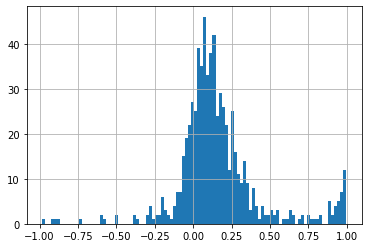

In [7]:
sentiment['scoreCom'].hist(bins=100)

In [8]:
sentiment.loc[sentiment['scoreCom'] > .85]

,text,docid,totalTokens,uniqueTokens,lexicalDiversity,scoreNeg,scoreNeu,scorePos,scoreCom
2,May 25 1892 Dear Sister I write once to Bid yo...,21324.txt,210,139,0.661905,0.046000,0.799000,0.155000,0.942300
4,February 1st 90 Dear Cousin It is with pleasur...,21354.txt,414,210,0.507246,0.028500,0.846000,0.125500,0.887100
10,Octr October 29 1888 My dear Uncle George I wo...,21792.txt,1208,507,0.419702,0.056333,0.767333,0.176333,0.947033
12,New York May 3 1853 My Dear Friend In Pat Elli...,22146.txt,950,342,0.360000,0.018500,0.789500,0.192000,0.965100
35,Feb 24th 1889 Dear Sister I have waited until ...,24209.txt,694,315,0.453890,0.060000,0.817000,0.123000,0.986700
39,July 5 1885 Dear sister it is With pleasure i ...,25585.txt,200,124,0.620000,0.032000,0.833000,0.136000,0.886000
43,February 9th 1881 Dear Cousin Mary Ann I hope ...,26062.txt,406,199,0.490148,0.005000,0.857500,0.137500,0.958650
46,April 28th 1883 Dear Daughter Eliza I once mor...,26431.txt,699,302,0.432046,0.031000,0.839000,0.130000,0.996700
57,Dec 5 1886 My dear cusins cousin Anna i I thou...,27573.txt,503,210,0.417495,0.042000,0.870000,0.088000,0.956500
68,Dear Mother you say you would like to now know...,29132.txt,327,160,0.489297,0.036000,0.873000,0.091000,0.926800


In [9]:
sentiment.iloc[216,0] 

'January 22nd Dear Sister 1889 I have waited very long for a letter from you but I see I shall have to write first and tell you I am well but for the toothache had laid me up pretty nearly all last week I got your Xmas present but sent you none I had also a letter from home and a card and a paper and Sunday last I answered the letter well I must tell you I purchased me a plush cloak at 30 dollars last week I like it very much and I tell you it is handsome if I had only a silk dress I bought me a pair of shoes at 5 dollars no 6 fit like a stocking I was thinking some of coming down in the month of March and bringing a young friend of mine an Irish girl with me I have not fully decided how did you like the letter I sent you to send to Willie and have you had an answer yet and did you have a letter from home how is all the folks down there you need not send those rubbers now for I suppose they are all worn out anyhow did you ever hear if Uncle Bole recognized us that evening I get along v

This is giving far fewer extremely positive scores but they are still the ones with minimal sentencing. 

In [10]:
sumVal = sentiment['scoreNeg'] + sentiment['scoreNeu'] + sentiment['scorePos']
sumVal.describe()

count    676.000000
mean       0.999897
std        0.001980
min        0.962963
25%        0.999988
50%        1.000000
75%        1.000000
max        1.001000
dtype: float64

<Axes: >

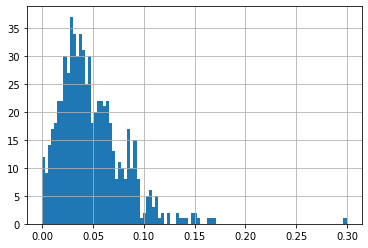

In [11]:
sentiment['scoreNeg'].hist(bins=100)

<Axes: >

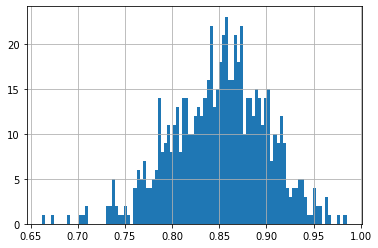

In [12]:
sentiment['scoreNeu'].hist(bins=100)

<Axes: >

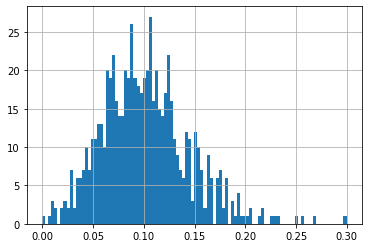

In [13]:
sentiment['scorePos'].hist(bins=100)

The distribution is similar to the original. Now let's try with the largest size lexicon. Again, restart kernel, switch the lexicons again in finder then re-reun code.

# Sentiment with aggressively modified VADER lexicon (no!)

In [1]:
import nltk
from nltk.corpus import PlaintextCorpusReader
from nltk.tokenize import RegexpTokenizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
from nltk import word_tokenize

import pandas as pd
import re
import numpy as np

tokenizer = RegexpTokenizer('\w+')
sentenceTokenizer = nltk.data.load('tokenizers/punkt/english.pickle') #Load tokenizer
sentimentAnalyzer = SentimentIntensityAnalyzer() #Initialize sentiment scorer

len(sentimentAnalyzer.lexicon)

14259

In [2]:
Corpus = PlaintextCorpusReader('20240604_PhD_Letters/cleaned', '.*txt') #Define corpus
len(Corpus.fileids()) #How many files

676

In [3]:
sentiment = pd.DataFrame(columns = ['text','docid', 'totalTokens', 'uniqueTokens', 'lexicalDiversity', 'scoreNeg', 'scoreNeu', 'scorePos', 'scoreCom']) # Create a new dataframe to hold sentences, letter id and compound scores
sentiment.head()

for fileid in Corpus.fileids(): # For each file in the corpus
    text = Corpus.raw(fileid) # Place the string into the object "text"
    # Now basic metrics
    tokens = tokenizer.tokenize(text)
    totalTokens = len(tokens)
    uniqueTokens = len(set(tokens))
    lexicalDiversity = uniqueTokens/totalTokens
    # Now score sentiment
    sentences = sentenceTokenizer.tokenize(text) # Place sentences into a list called "sentences"
    scoreNeg = 0.0
    scoreNeu = 0.0
    scorePos = 0.0
    scoreCom = 0.0
    #sequence = 0 # Create a counter to keep track of sentence order
    for sentence in sentences: # For each sentence in the letter 
        #sequence +=1 # Counter updater
        scores = sentimentAnalyzer.polarity_scores(sentence) # Calculate sentiment scores
        scoreNeg += scores["neg"]
        scoreNeu += scores["neu"]
        scorePos += scores["pos"]
        scoreCom += scores["compound"]
    scoreNeg = scoreNeg / len(sentences)
    scoreNeu = scoreNeu / len(sentences)
    scorePos = scorePos / len(sentences)
    scoreCom = scoreCom / len(sentences)
    new_row = pd.Series([text, fileid, totalTokens, uniqueTokens, lexicalDiversity, scoreNeg, scoreNeu, scorePos, scoreCom], index=['text','docid', 'totalTokens', 'uniqueTokens', 'lexicalDiversity', 'scoreNeg', 'scoreNeu', 'scorePos', 'scoreCom'])
    sentiment = pd.concat([sentiment, new_row.to_frame().T], ignore_index=True)
    print(fileid) # Show progress
print("done")

20910.txt
21062.txt
21324.txt
21334.txt
21354.txt
21470.txt
21549.txt
21561.txt
21737.txt
21759.txt
21792.txt
22032.txt
22146.txt
22179.txt
22270.txt
22368.txt
22375.txt
22668.txt
22911.txt
22996.txt
23229.txt
23395.txt
23409.txt
23458.txt
23470.txt
23529.txt
23567.txt
23590.txt
23790.txt
23846.txt
23880.txt
23918.txt
23927.txt
23971.txt
24011.txt
24209.txt
24226.txt
24366.txt
24472.txt
25585.txt
25771.txt
25794.txt
25809.txt
26062.txt
26197.txt
26219.txt
26431.txt
26439.txt
26511.txt
26678.txt
26789.txt
26906.txt
27000.txt
27097.txt
27261.txt
27435.txt
27442.txt
27573.txt
27695.txt
27779.txt
27805.txt
27815.txt
27889.txt
27978.txt
28535.txt
28772.txt
28774.txt
28960.txt
29132.txt
29364.txt
29748.txt
29751.txt
29826.txt
29827.txt
30200.txt
30559.txt
30620.txt
30623.txt
30636.txt
30808.txt
30868.txt
30931.txt
31245.txt
31349.txt
31379.txt
31412.txt
31637.txt
31942.txt
31969.txt
31983.txt
32094.txt
32097.txt
32418.txt
32432.txt
32543.txt
32751.txt
32756.txt
32815.txt
32964.txt
32980.txt


S9865-D036.txt
S9865-D037.txt
S9865-D038.txt
S9865-D039.txt
S9865-D040.txt
S9865-D045.txt
S9865-D046.txt
S9865-D047.txt
S9865-D054.txt
S9865-D055.txt
S9865-D056.txt
S9865-D057.txt
S9865-D058.txt
S9865-D059.txt
S9865-D060.txt
S9865-D061.txt
S9873-D013.txt
S9873-D014.txt
S9873-D015.txt
S9873-D017.txt
S9873-D018.txt
S9873-D019.txt
S9873-D020.txt
S9873-D021.txt
S9913-D003.txt
S9913-D004.txt
S9913-D006.txt
S9913-D015.txt
S9913-D016.txt
S9957-D012.txt
S9957-D013.txt
S9957-D014.txt
S9957-D015.txt
S9974-D008.txt
S9974-D010.txt
done


In [30]:
# What is the overall shape of the dataframe
sentiment.shape

(676, 9)

In [5]:
#re-jig data types
cols = ['lexicalDiversity', 'scoreNeg', 'scoreNeu', 'scorePos', 'scoreCom']
sentiment[cols] = sentiment[cols].apply(pd.to_numeric, errors='coerce', axis=1)

sentiment['totalTokens'] = sentiment['totalTokens'].astype(int)
sentiment['uniqueTokens'] = sentiment['uniqueTokens'].astype(int)

sentiment['scoreCom'].describe()

count    676.000000
mean       0.383967
std        0.251152
min       -0.596025
25%        0.233054
50%        0.342984
75%        0.484220
max        0.999600
Name: scoreCom, dtype: float64

<Axes: >

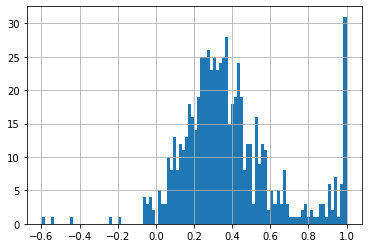

In [6]:
sentiment['scoreCom'].hist(bins=100)

In [11]:
sentiment.loc[sentiment['scoreCom'] > .85]

,text,docid,totalTokens,uniqueTokens,lexicalDiversity,scoreNeg,scoreNeu,scorePos,scoreCom
2,May 25 1892 Dear Sister I write once to Bid yo...,21324.txt,210,139,0.661905,0.154000,0.446000,0.401000,0.974200
4,February 1st 90 Dear Cousin It is with pleasur...,21354.txt,414,210,0.507246,0.071500,0.514000,0.414000,0.989200
10,Octr October 29 1888 My dear Uncle George I wo...,21792.txt,1208,507,0.419702,0.143333,0.481000,0.375667,0.886433
12,New York May 3 1853 My Dear Friend In Pat Elli...,22146.txt,950,342,0.360000,0.113000,0.489500,0.397500,0.978550
14,October the 7th 76 Dear Sarah I received your ...,22270.txt,153,93,0.607843,0.164000,0.498000,0.338000,0.914000
21,From: 641 Folson St Street San Francisco Calif...,23395.txt,333,182,0.546547,0.172000,0.536000,0.292000,0.967600
24,August the 27 1846 Dear father and Mother Brot...,23470.txt,1052,448,0.425856,0.170000,0.540500,0.289500,0.910800
29,March 20 1881 Dear Sister I send you these few...,23846.txt,446,209,0.468610,0.101333,0.507333,0.391000,0.915300
31,June My dear Uncle George I have just read you...,23918.txt,1118,491,0.439177,0.129000,0.467250,0.403500,0.883650
35,Feb 24th 1889 Dear Sister I have waited until ...,24209.txt,694,315,0.453890,0.104000,0.466000,0.430000,0.999400


Similar distribution as to the original set but with hyper positive scores more concentrated near 1.

In [12]:
sumVal = sentiment['scoreNeg'] + sentiment['scoreNeu'] + sentiment['scorePos']
sumVal.describe()

count    676.000000
mean       0.999891
std        0.001984
min        0.962889
25%        0.999944
50%        1.000000
75%        1.000056
max        1.001000
dtype: float64

<Axes: >

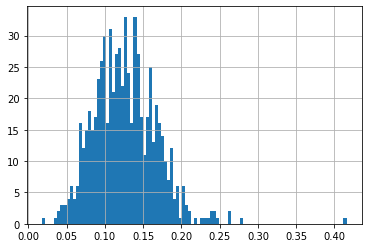

In [7]:
sentiment['scoreNeg'].hist(bins=100)

<Axes: >

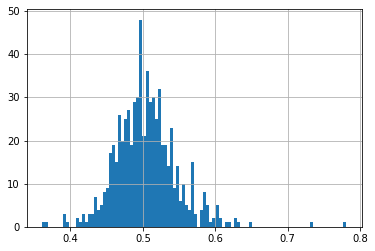

In [8]:
sentiment['scoreNeu'].hist(bins=100)

<Axes: >

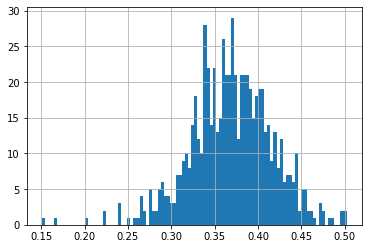

In [9]:
sentiment['scorePos'].hist(bins=100)

This lexicon yields the most variance, which will be best for regression analysis. 

I have decided to use the conservatively modified VADER lexicon, which only replaces values for tokens that are already present, rather than adding new tokens. This is because the positive outliers, which appear to be a result of underpunctuation (specifically, the lack of full stops to indicate sentence boundaries), are less numerous. Also, the mean value of .16 (mildly positive) accords well with the mean value found in my master's thesis. The other two lexicons (i.e., the original and the strongly modified version) both have means above .3 because of the positive outliers.

Re-running the medium series above.

## Summary Stats

In [14]:
sentiment.describe()

,totalTokens,uniqueTokens,lexicalDiversity,scoreNeg,scoreNeu,scorePos,scoreCom
count,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000
mean,626.634615,286.939349,0.530664,0.048275,0.850371,0.101252,0.161641
std,515.944850,172.857092,0.111863,0.031405,0.050523,0.042625,0.272620
min,89.000000,67.000000,0.272199,0.000000,0.662333,0.000000,-0.983900
25%,257.750000,158.000000,0.447523,0.026701,0.816932,0.070704,0.032361
50%,460.000000,236.500000,0.518745,0.042000,0.854031,0.098597,0.120060
75%,842.250000,367.500000,0.611678,0.064531,0.885750,0.125178,0.243755
max,4827.000000,1455.000000,0.863636,0.299500,0.985000,0.299667,0.998000


In [27]:
print(len(sentiment.loc[sentiment['totalTokens'] < 86])/len(sentiment))
print(len(sentiment.loc[sentiment['totalTokens'] > 250])/len(sentiment))

0.0
0.7677514792899408


<Axes: >

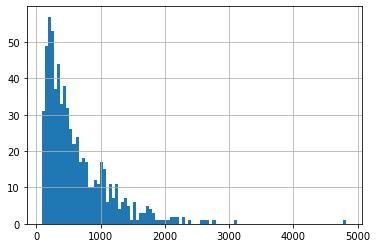

In [18]:
sentiment['totalTokens'].hist(bins=100)

<Axes: >

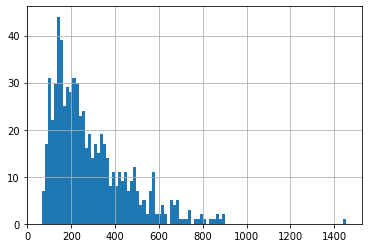

In [26]:
sentiment['uniqueTokens'].hist(bins=100)

<Axes: >

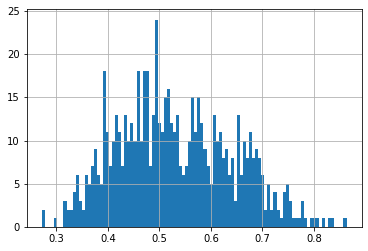

In [20]:
sentiment['lexicalDiversity'].hist(bins=100)

<Axes: >

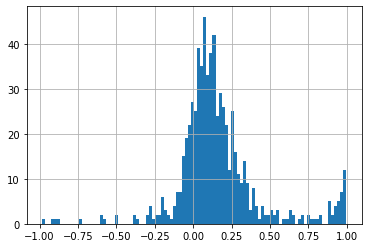

In [21]:
sentiment['scoreCom'].hist(bins=100)

<Axes: >

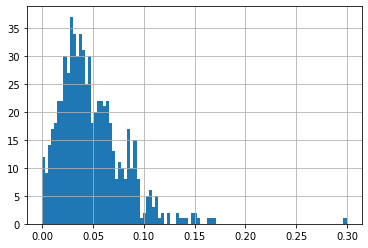

In [22]:
sentiment['scoreNeg'].hist(bins=100)

<Axes: >

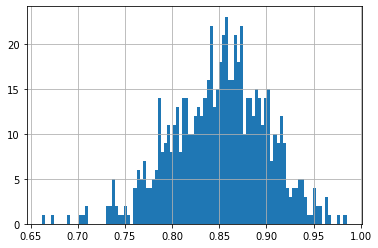

In [23]:
sentiment['scoreNeu'].hist(bins=100)

<Axes: >

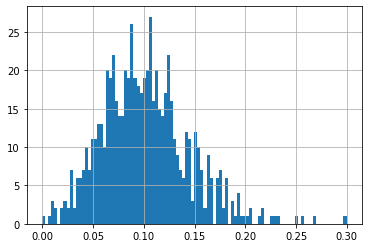

In [24]:
sentiment['scorePos'].hist(bins=100)

## Export

In [29]:
sentiment.to_csv('20240607_PhD_SentimentLetters.csv', index = True, encoding="utf-8")